In [1]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading Datasets

df = pd.read_csv(r"C:\Users\User\Documents\project_data\SampleData\data_jobs.csv")

In [3]:
# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for US Data Analyst Roles

In [4]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,NaN,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,NaN,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,NaN,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,NaN,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN


In [5]:
# see top 10 job location
df_DA_US['job_location'].value_counts().head(10)

job_location
Anywhere           5106
New York, NY       3035
Atlanta, GA        2741
Chicago, IL        2337
Austin, TX         1919
Dallas, TX         1862
Washington, DC     1592
Charlotte, NC      1433
Tampa, FL          1431
Los Angeles, CA    1328
Name: count, dtype: int64

In [33]:
# change to frame so easy to plot

df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

In [34]:
df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


In [36]:
df_plot = df_plot.reset_index()

In [37]:
df_plot

,job_location,count
0,Anywhere,5106
1,"New York, NY",3035
2,"Atlanta, GA",2741
3,"Chicago, IL",2337
4,"Austin, TX",1919
5,"Dallas, TX",1862
6,"Washington, DC",1592
7,"Charlotte, NC",1433
8,"Tampa, FL",1431
9,"Los Angeles, CA",1328


<Axes: xlabel='count', ylabel='job_location'>

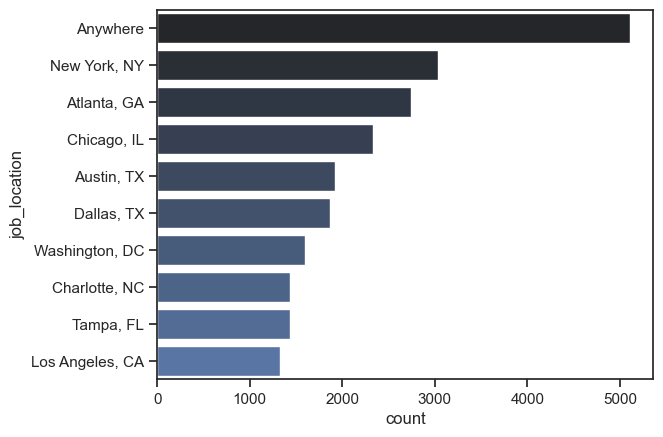

In [39]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', palette='dark:b')

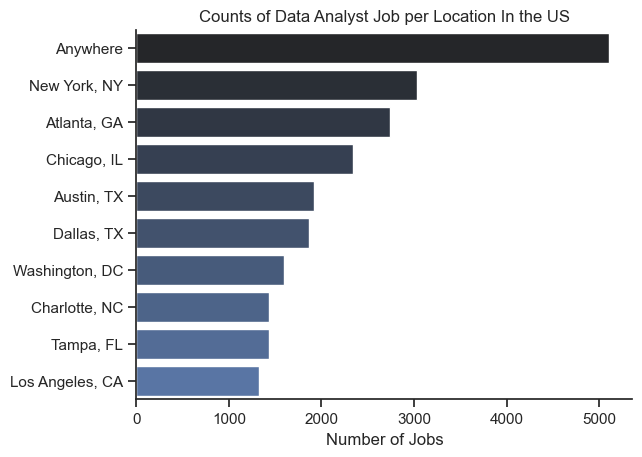

In [40]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', palette='dark:b')
sns.despine()
plt.title('Counts of Data Analyst Job per Location In the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

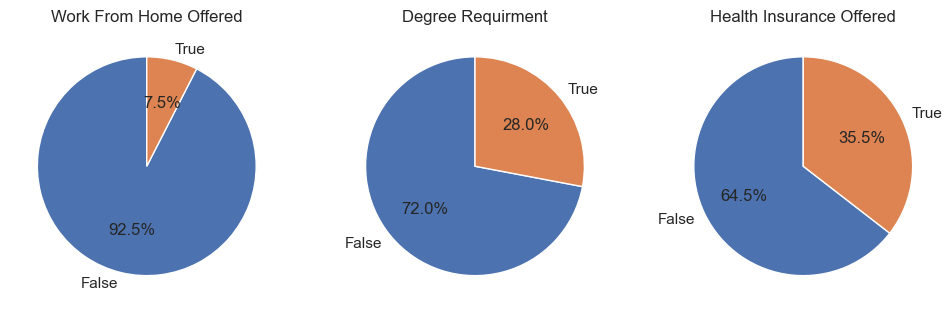

In [42]:
# make a pie chart about wfh, no degree, health insurance
dict_column = {
    'job_work_from_home' : 'Work From Home Offered',
    'job_no_degree_mention' : 'Degree Requirment',
    'job_health_insurance' : 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

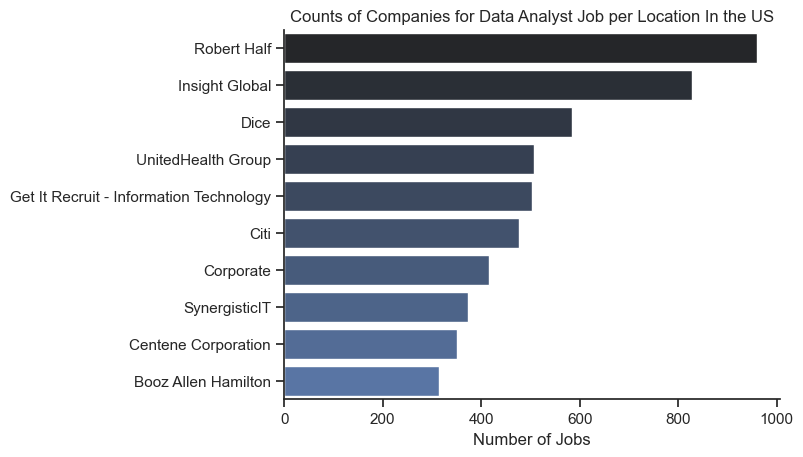

In [46]:
# Companies job counts
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
df_plot = df_plot.reset_index()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', palette='dark:b')
sns.despine()
plt.title('Counts of Companies for Data Analyst Job per Location In the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()
